In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [3]:
x_Train=x_train_image.reshape(60000, 784).astype('float32')
x_Test=x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [8]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [11]:
%matplotlib inline
train_history = model.fit(x=x_Train_normalize,
                          y=y_Train_OneHot,validation_split=0.2,
                          epochs=8,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
 - 1s - loss: 0.4434 - acc: 0.8813 - val_loss: 0.2193 - val_acc: 0.9400
Epoch 2/8
 - 0s - loss: 0.1916 - acc: 0.9451 - val_loss: 0.1558 - val_acc: 0.9555
Epoch 3/8
 - 0s - loss: 0.1358 - acc: 0.9616 - val_loss: 0.1261 - val_acc: 0.9645
Epoch 4/8
 - 0s - loss: 0.1031 - acc: 0.9703 - val_loss: 0.1123 - val_acc: 0.9680
Epoch 5/8
 - 0s - loss: 0.0812 - acc: 0.9773 - val_loss: 0.0986 - val_acc: 0.9717
Epoch 6/8
 - 0s - loss: 0.0661 - acc: 0.9814 - val_loss: 0.0938 - val_acc: 0.9722
Epoch 7/8
 - 0s - loss: 0.0546 - acc: 0.9849 - val_loss: 0.0914 - val_acc: 0.9735
Epoch 8/8
 - 0s - loss: 0.0458 - acc: 0.9876 - val_loss: 0.0829 - val_acc: 0.9765


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

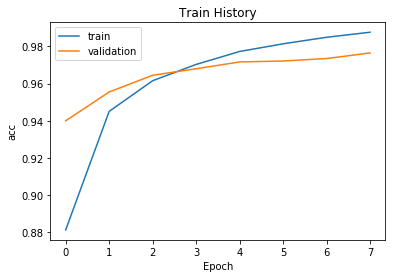

In [13]:
show_train_history(train_history,'acc','val_acc')

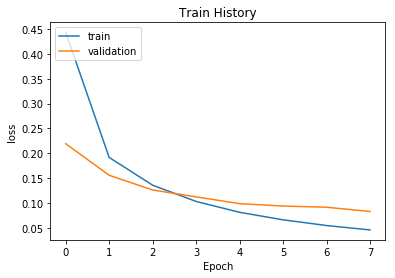

In [14]:
show_train_history(train_history,'loss','val_loss')

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 18us/step

accuracy= 0.9768


In [19]:
prediction=model.predict_classes(x_Test)

In [22]:
def plot_images_labels_prediction(image, labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(image[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title+= ", prediction = " +  str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

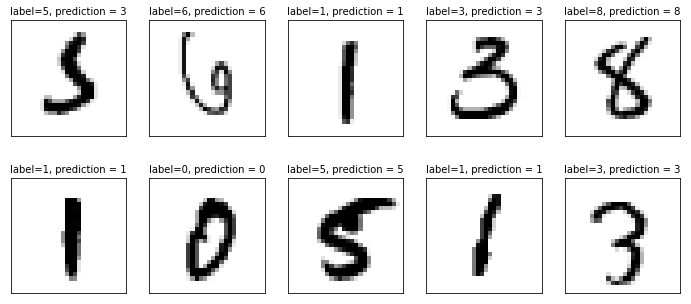

In [23]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [24]:
#confusion matrix
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,3,1,1,0,1,1,3,0
1,0,1116,4,1,0,1,3,0,10,0
2,3,0,1007,3,3,0,2,6,8,0
3,0,0,0,994,0,2,0,5,7,2
4,2,0,1,1,959,0,4,1,2,12
5,2,0,0,10,2,863,5,2,5,3
6,7,3,1,1,4,4,932,0,6,0
7,0,4,7,2,1,0,0,1004,4,6
8,4,0,2,5,3,2,1,5,950,2


In [28]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})

,label,predict
0,7,7
1,2,2


In [31]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
4271,5,3
4355,5,3
4360,5,3
5937,5,3
5972,5,3


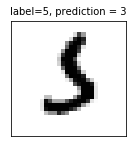

In [32]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)